# Linear Regression with Single variable from scratch using Ordinary Least Square Method

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
data = pd.read_csv('/home/deep/Documents/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [6]:
m = len(X)
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.26342933948939945 325.57342104944223


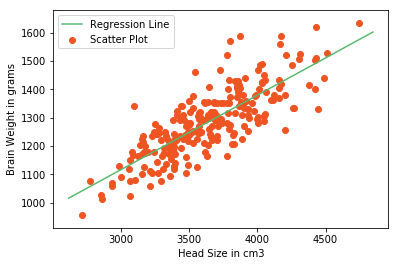

In [8]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [9]:
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [10]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


# Linear Regression with Single variable using Scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))

reg = LinearRegression()
reg = reg.fit(X, Y)

Y_pred = reg.predict(X)

mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)


72.1206213783709
0.639311719957


# Linear Regression with Multiple variables from scratch using Gradient Descent Approach

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('/home/deep/Documents/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


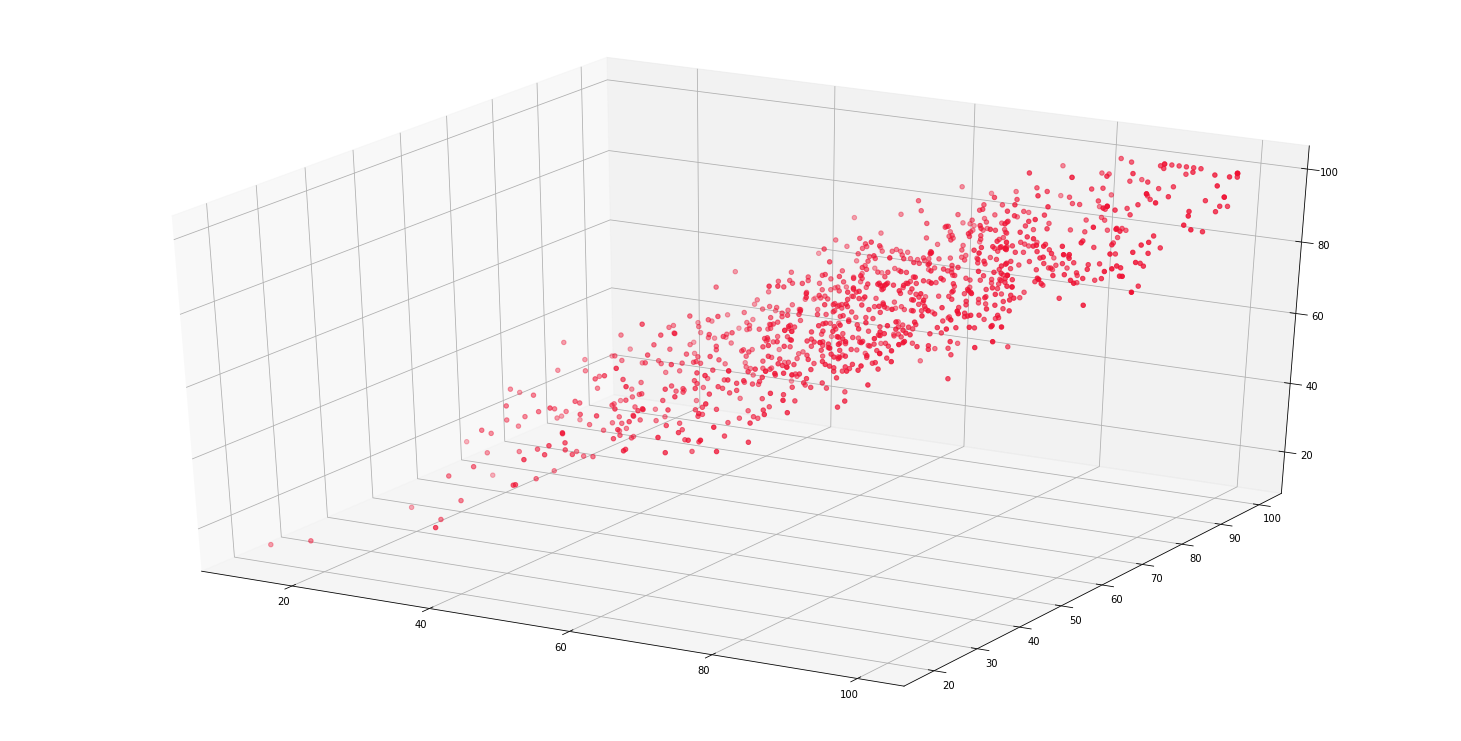

In [17]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

In [18]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [19]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [20]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [21]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history


In [22]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539169


In [23]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.577143972727789
0.9097223273061553


# Linear Regression with Multiple variables using Scikit-Learn

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


# Linear Regression with Single variable from scratch using Gradient Descent Approach

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('/home/deep/Documents/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
head_size = data['Head Size(cm^3)'].values
brain_weight = data['Brain Weight(grams)'].values
m = len(head_size)
x0 = np.ones(m)
X = np.array([x0, head_size]).T
B = np.array([0, 0])
Y = np.array(brain_weight)
alpha = 0.0001

In [4]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [5]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

830092.4620253164


In [6]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [7]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 40)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-9.40902608e+120 -3.45363004e+124]
7.954937139100401e+255


In [8]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

1.26134350112096e+128
-1.1032650460359435e+252


# Linear Regression Single Var using OLS from statsmodels

In [27]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

/home/deep/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [28]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [29]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [30]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Fri, 14 Sep 2018   Prob (F-statistic):          2.83e-239
Time:                        15:39:35   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [31]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


# OLS non-linear curve but linear in parameters

In [32]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [33]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           6.30e-27
Time:                        16:08:01   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [34]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


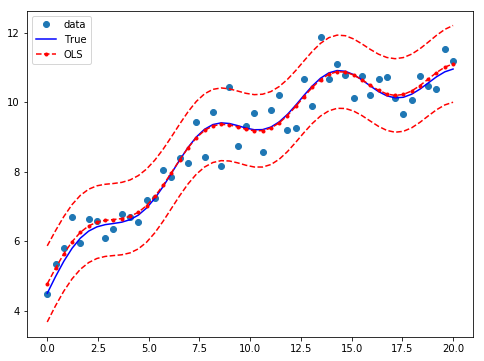

In [35]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');